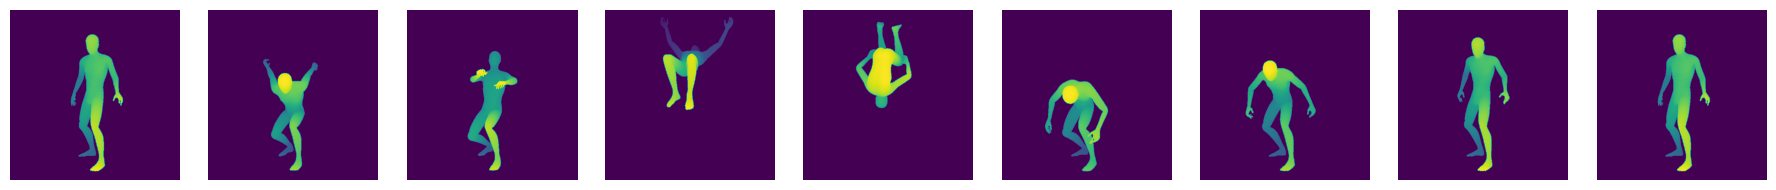

In [1]:
%load_ext autoreload
%autoreload 2

import torch

from text3d2video.artifacts.anim_artifact import AnimationArtifact
from text3d2video.utilities.ipython_utils import display_ims
from text3d2video.rendering import render_depth_map

torch.set_grad_enabled(False)

animation_tag = "backflip:latest"

animation = AnimationArtifact.from_wandb_artifact_tag(animation_tag)
n_frames = 9
frame_indices = animation.frame_indices(n_frames)
cameras, meshes = animation.load_frames(frame_indices)

depths = render_depth_map(meshes, cameras)
display_ims(depths)

In [12]:
from pytorch3d.renderer import RasterizationSettings, MeshRasterizer

raster_settings = RasterizationSettings(
    image_size=100,
    blur_radius=0.0,
    faces_per_pixel=1,
    bin_size=None
)

rasterizer = MeshRasterizer(raster_settings=raster_settings)

frags = rasterizer(meshes, cameras=cameras)

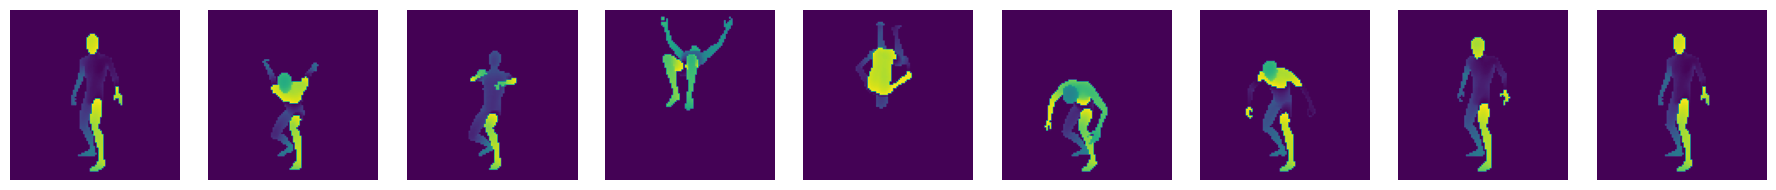

In [14]:
import torchvision.transforms.functional as TF

zbuf_ims = frags.zbuf.cpu().numpy()
zbuf_ims = [TF.to_pil_image(zbuf_im) for zbuf_im in zbuf_ims]

display_ims(zbuf_ims)